# Analyzing Trading Strategies for Algorithmic Trading Bot
# -
# -
# -
### I wanted to explore the stock market and learn more about finance so I started looking into trading strategies. Then I thought why don't I make an algorithmic trading bot to do all the work for me!!! If only it were that simple...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


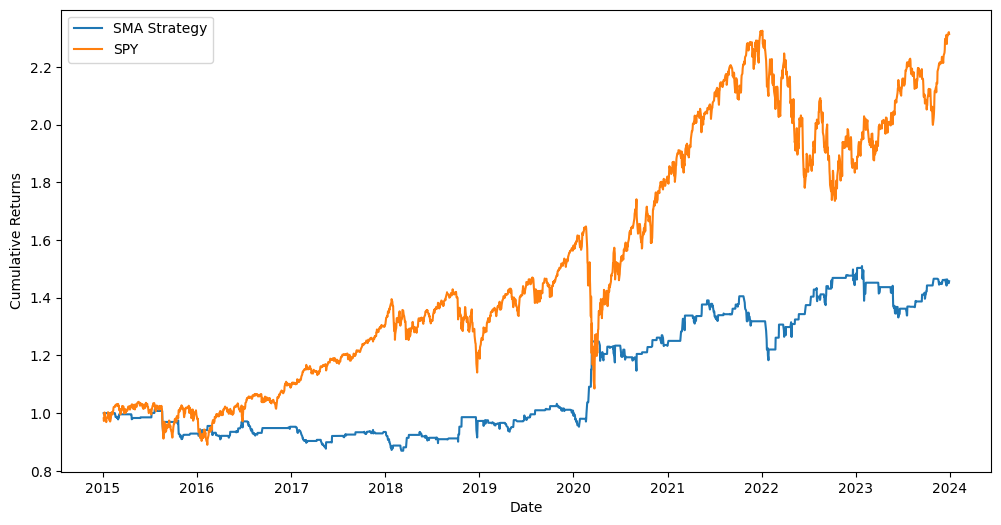

In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time

# Historical data
symbol = 'QQQ'
start_date = '2015-01-01'
end_date = '2023-12-31'
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate 14 day RSI
def rsi(data, period):
    delta = data.diff().dropna()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain/avg_loss
    return (100-(100/(1+rs)))

data['RSI'] = rsi(data['Close'], 14)

# Implement strategy
data['Signal'] = 0
data.loc[data['RSI'] < 30, 'Signal'] = 1
data.loc[data['RSI'] > 70, 'Signal'] = -1

# Backtest
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)
data['Cumulative_Return'] = (1+data['Strategy_Return']).cumprod()

spy_data = yf.download('SPY', start=start_date, end=end_date)
spy_data['Daily_Return'] = spy_data['Close'].pct_change() 
spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod()

# Plot results
plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Cumulative_Return'], label='SMA Strategy') 
plt.plot(spy_data.index, spy_data['Cumulative_Return'], label='SPY') 
plt.xlabel('Date') 
plt.ylabel('Cumulative Returns') 
plt.legend() 
plt.show()

# Code to connect Alpaca trading API

In [ ]:
from alpaca_trade_api import REST 
api_key = 'API_KEY' 
api_secret = 'SECRET_KEY' 
base_url = 'https://paper-api.alpaca.markets'
api = REST(api_key, api_secret, base_url)

# -
# -
# -
# -
# -
# Price Prediction using LSTM MODEL

Epoch 1/100
43/43 [==============================] - 10s 144ms/step - loss: 0.0084 - val_loss: 0.0012
Epoch 2/100
43/43 [==============================] - 4s 102ms/step - loss: 2.0519e-04 - val_loss: 0.0013
Epoch 3/100
43/43 [==============================] - 4s 96ms/step - loss: 1.4312e-04 - val_loss: 0.0011
Epoch 4/100
43/43 [==============================] - 4s 83ms/step - loss: 1.3633e-04 - val_loss: 0.0012
Epoch 5/100
43/43 [==============================] - 4s 82ms/step - loss: 1.4203e-04 - val_loss: 0.0012
Epoch 6/100
43/43 [==============================] - 4s 86ms/step - loss: 1.3109e-04 - val_loss: 0.0012
Epoch 7/100
43/43 [==============================] - 4s 88ms/step - loss: 1.2991e-04 - val_loss: 0.0012
Epoch 8/100
43/43 [==============================] - 4s 82ms/step - loss: 1.3438e-04 - val_loss: 0.0013
Epoch 9/100
43/43 [==============================] - 4s 82ms/step - loss: 1.4203e-04 - val_loss: 0.0011
Epoch 10/100
43/43 [==============================] - 4s 85ms/ste

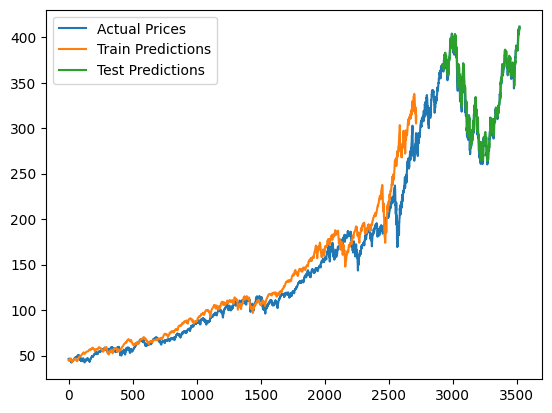

In [74]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load historical stock data
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-01-01', progress=False)

# Preprocess data
# Extract the close price as the feature for the LSTM model
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]

# Prepare data for LSTM model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

# Predict stock prices using LSTM model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot predictions vs actual prices
plt.plot(data, label='Actual Prices')
plt.plot(train_predict, label='Train Predictions')
plt.plot(np.arange(len(data)-len(test_predict), len(data)), test_predict, label='Test Predictions')
plt.legend()
plt.show()


# Trading With LSTM Model


Epoch 1/100
43/43 [==============================] - 9s 110ms/step - loss: 0.0110 - val_loss: 0.0016
Epoch 2/100
43/43 [==============================] - 4s 83ms/step - loss: 1.7782e-04 - val_loss: 0.0012
Epoch 3/100
43/43 [==============================] - 3s 81ms/step - loss: 1.5307e-04 - val_loss: 0.0013
Epoch 4/100
43/43 [==============================] - 3s 81ms/step - loss: 1.4893e-04 - val_loss: 0.0012
Epoch 5/100
43/43 [==============================] - 3s 79ms/step - loss: 1.4797e-04 - val_loss: 0.0012
Epoch 6/100
43/43 [==============================] - 4s 86ms/step - loss: 1.4756e-04 - val_loss: 0.0012
Epoch 7/100
43/43 [==============================] - 4s 95ms/step - loss: 1.4416e-04 - val_loss: 0.0012
Epoch 8/100
43/43 [==============================] - 4s 88ms/step - loss: 1.4862e-04 - val_loss: 0.0013
Epoch 9/100
43/43 [==============================] - 4s 101ms/step - loss: 1.3991e-04 - val_loss: 0.0011
Epoch 10/100
43/43 [==============================] - 4s 95ms/step

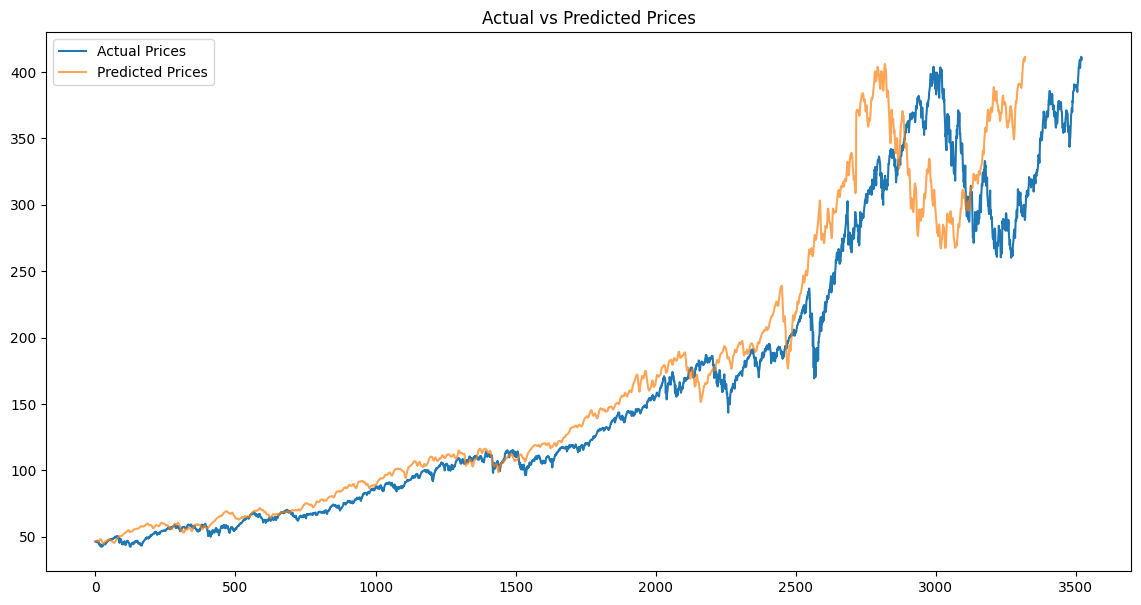

In [71]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load historical stock data for QQQ using yfinance
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-01-01', progress=False)

# Preprocess data
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]

# Prepare data for LSTM model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

# Predict stock prices using LSTM model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Combine training and test predictions for analysis
full_predictions = np.concatenate((train_predict, test_predict), axis=0)

# Calculate returns and strategy returns
full_data = np.concatenate((train_data, test_data), axis=0)
full_data = scaler.inverse_transform(full_data)

strategy_returns = np.diff(full_predictions.flatten()) / full_predictions[:-1].flatten()
actual_returns = np.diff(full_data.flatten()) / full_data[:-1].flatten()

# Sharpe ratio
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)

# Maximum drawdown
cumulative_returns = (1 + strategy_returns).cumprod()
drawdown = cumulative_returns / np.maximum.accumulate(cumulative_returns) - 1
max_drawdown = drawdown.min()

# Win rate
positive_returns = strategy_returns[strategy_returns > 0]
win_rate = len(positive_returns) / len(strategy_returns)

num_trades = len(strategy_returns)

# Print performance metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Win Rate:", win_rate)
print("Number of Trades:", num_trades)

# Plot predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(full_data, label='Actual Prices')
plt.plot(full_predictions, label='Predicted Prices', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()


# Advanced LSTM

/var/folders/dj/vzn42g8n78j5yj1m0qh0y0vh0000gn/T/ipykernel_96386/83743438.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='bfill')


Epoch 1/100
45/45 [==============================] - 9s 89ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 2/100
45/45 [==============================] - 2s 53ms/step - loss: 8.3253e-04 - val_loss: 0.0017
Epoch 3/100
45/45 [==============================] - 3s 69ms/step - loss: 6.8956e-04 - val_loss: 0.0019
Epoch 4/100
45/45 [==============================] - 3s 56ms/step - loss: 6.4447e-04 - val_loss: 8.9053e-04
Epoch 5/100
45/45 [==============================] - 2s 53ms/step - loss: 5.9015e-04 - val_loss: 7.0652e-04
Epoch 6/100
45/45 [==============================] - 2s 49ms/step - loss: 5.3136e-04 - val_loss: 9.3499e-04
Epoch 7/100
45/45 [==============================] - 3s 60ms/step - loss: 5.4983e-04 - val_loss: 0.0027
Epoch 8/100
45/45 [==============================] - 3s 60ms/step - loss: 5.2926e-04 - val_loss: 7.6019e-04
Epoch 9/100
45/45 [==============================] - 3s 56ms/step - loss: 5.2120e-04 - val_loss: 8.6274e-04
Epoch 10/100
45/45 [============================

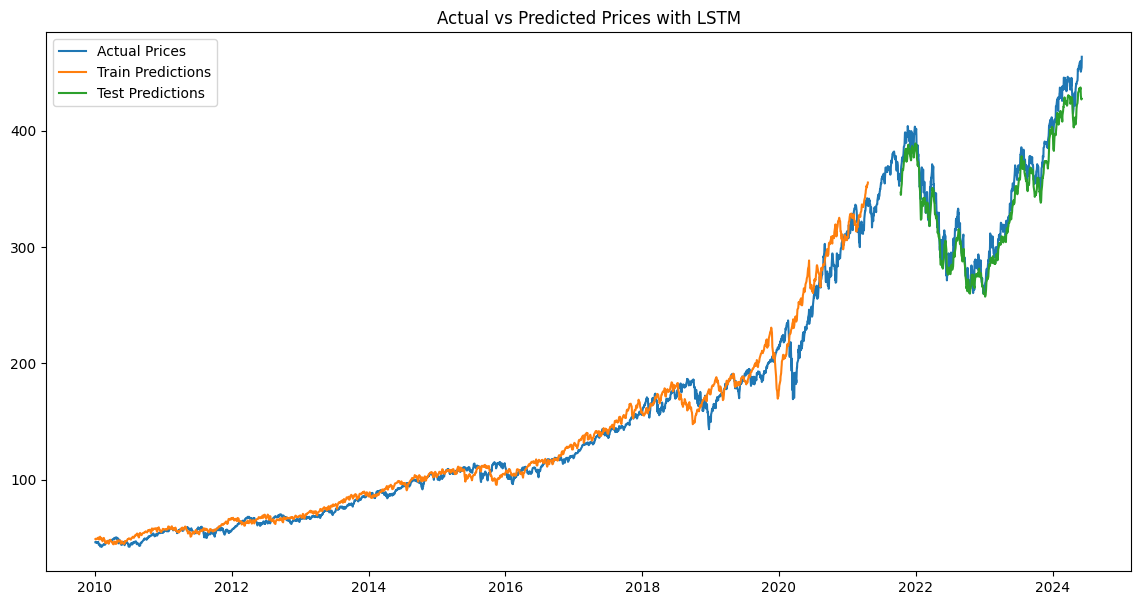

In [75]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import ta

# Load historical stock data
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-06-06', progress=False)

# Calculate additional technical indicators
stock_data['SMA'] = ta.trend.sma_indicator(stock_data['Close'], window=30)
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=14)
stock_data['Volatility'] = stock_data['Close'].rolling(window=30).std()

# Fill NaN values
stock_data = stock_data.fillna(method='bfill')

# Selected features
features = ['Close', 'SMA', 'RSI', 'Volatility']
data = stock_data[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]

# Prepare data for LSTM model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), :])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

# Predict stock prices using LSTM model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
Y_train_inverse = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
Y_test_inverse = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], data.shape[1] - 1))), axis=1))[:, 0]

# Calculate returns and strategy returns
test_data_range = stock_data.iloc[len(train_data) + time_step:len(train_data) + time_step + len(test_predict)].index

# Calculate strategy returns with stop-loss and take-profit
initial_investment = 10000
capital = initial_investment
stop_loss = 0.05  # 5% stop loss
take_profit = 0.10  # 10% take profit

positions = []
strategy_returns = []
for i in range(len(test_predict) - 1):
    if test_predict[i] < Y_test_inverse[i]:
        # Buy signal
        buy_price = Y_test_inverse[i]
        for j in range(i + 1, len(test_predict)):
            if Y_test_inverse[j] <= buy_price * (1 - stop_loss):
                # Stop-loss triggered
                sell_price = Y_test_inverse[j]
                positions.append((buy_price, sell_price, sell_price - buy_price))
                strategy_returns.append((sell_price - buy_price) / buy_price)
                break
            elif Y_test_inverse[j] >= buy_price * (1 + take_profit):
                # Take-profit triggered
                sell_price = Y_test_inverse[j]
                positions.append((buy_price, sell_price, sell_price - buy_price))
                strategy_returns.append((sell_price - buy_price) / buy_price)
                break
            elif j == len(test_predict) - 1:
                # End of test data, close position
                sell_price = Y_test_inverse[j]
                positions.append((buy_price, sell_price, sell_price - buy_price))
                strategy_returns.append((sell_price - buy_price) / buy_price)

# Calculate total returns
total_profit = sum([position[2] for position in positions])
final_capital = initial_investment + total_profit

# Calculate performance metrics
strategy_returns = np.array(strategy_returns)
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
cumulative_returns = (1 + strategy_returns).cumprod()
drawdown = cumulative_returns / np.maximum.accumulate(cumulative_returns) - 1
max_drawdown = drawdown.min()
win_rate = len(strategy_returns[strategy_returns > 0]) / len(strategy_returns)
num_trades = len(positions)

# Print performance metrics
print(f"Initial Investment: ${initial_investment}")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit: ${total_profit}")
print(f"Number of Trades: {num_trades}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")
print(f"Win Rate: {win_rate}")

# Plot predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Actual Prices')
plt.plot(stock_data.iloc[:len(train_predict)].index, train_predict, label='Train Predictions')
plt.plot(test_data_range, test_predict, label='Test Predictions')
plt.legend()
plt.title('Actual vs Predicted Prices with LSTM')
plt.show()


# Mean Reversion

/var/folders/dj/vzn42g8n78j5yj1m0qh0y0vh0000gn/T/ipykernel_96386/643112972.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][window:] = np.where(data['Close'][window:] < data['Lower Band'][window:], 1, 0)
/var/folders/dj/vz

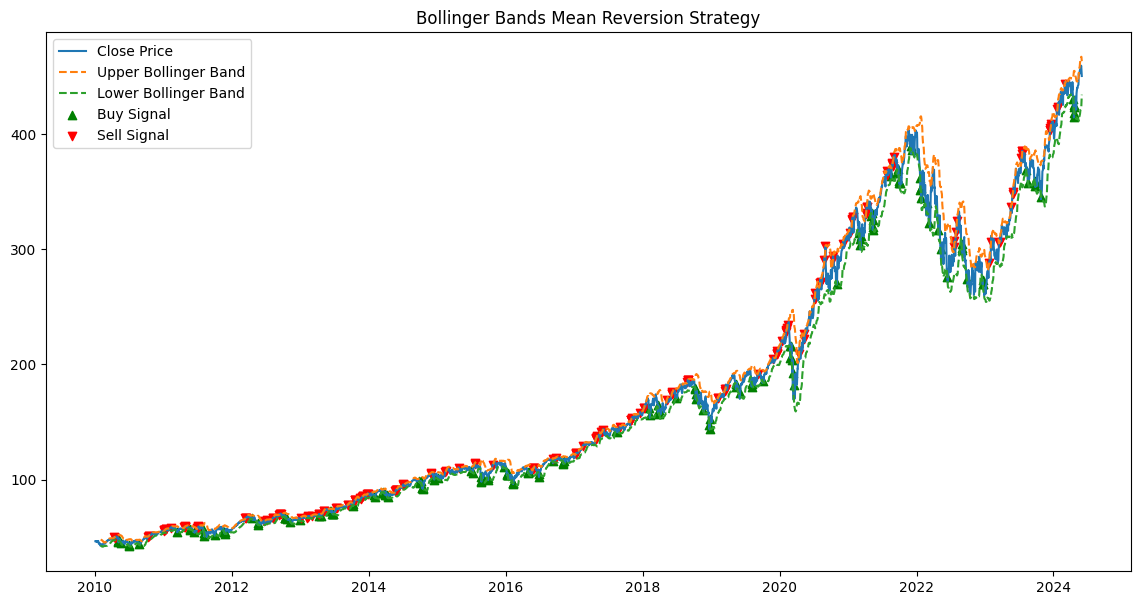

Initial Capital: $10000
Final Capital: $16638.715802715815
Total Profit: $6638.715802715815
Number of Trades: 192
Sharpe Ratio: 0.5192813868671904
Maximum Drawdown: -0.11059388638288559
Win Rate: 0.04605626034197463


In [77]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load historical stock data
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-06-01', progress=False)

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['MA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['MA'] + (data['STD'] * num_std_dev)
    data['Lower Band'] = data['MA'] - (data['STD'] * num_std_dev)
    return data

stock_data = calculate_bollinger_bands(stock_data)

# Generate Buy/Sell Signals
def generate_signals(data, window=20):
    data['Signal'] = 0
    data['Signal'][window:] = np.where(data['Close'][window:] < data['Lower Band'][window:], 1, 0)
    data['Signal'][window:] = np.where(data['Close'][window:] > data['Upper Band'][window:], -1, data['Signal'][window:])
    data['Position'] = data['Signal'].shift(1)
    return data

stock_data = generate_signals(stock_data)

# Backtest the Strategy
def backtest_strategy(data, initial_capital=10000):
    data['Returns'] = data['Close'].pct_change()
    data['Strategy Returns'] = data['Returns'] * data['Position']
    data['Cumulative Returns'] = (1 + data['Strategy Returns']).cumprod()
    final_capital = initial_capital * data['Cumulative Returns'].iloc[-1]
    return data, final_capital

stock_data, final_capital = backtest_strategy(stock_data)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['Upper Band'], label='Upper Bollinger Band', linestyle='--')
plt.plot(stock_data['Lower Band'], label='Lower Bollinger Band', linestyle='--')
plt.scatter(stock_data.index[stock_data['Position'] == 1], stock_data['Close'][stock_data['Position'] == 1], label='Buy Signal', marker='^', color='g')
plt.scatter(stock_data.index[stock_data['Position'] == -1], stock_data['Close'][stock_data['Position'] == -1], label='Sell Signal', marker='v', color='r')
plt.legend()
plt.title('Bollinger Bands Mean Reversion Strategy')
plt.show()

# Calculate performance metrics
initial_capital = 10000
strategy_returns = stock_data['Strategy Returns'].dropna()
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
cumulative_returns = (1 + strategy_returns).cumprod()
drawdown = cumulative_returns / np.maximum.accumulate(cumulative_returns) - 1
max_drawdown = drawdown.min()
win_rate = len(strategy_returns[strategy_returns > 0]) / len(strategy_returns)
num_trades = stock_data['Position'].diff().abs().sum() / 2

# Print performance metrics
print(f"Initial Capital: ${initial_capital}")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit: ${final_capital - initial_capital}")
print(f"Number of Trades: {int(num_trades)}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")
print(f"Win Rate: {win_rate}")


# Momentum Trading

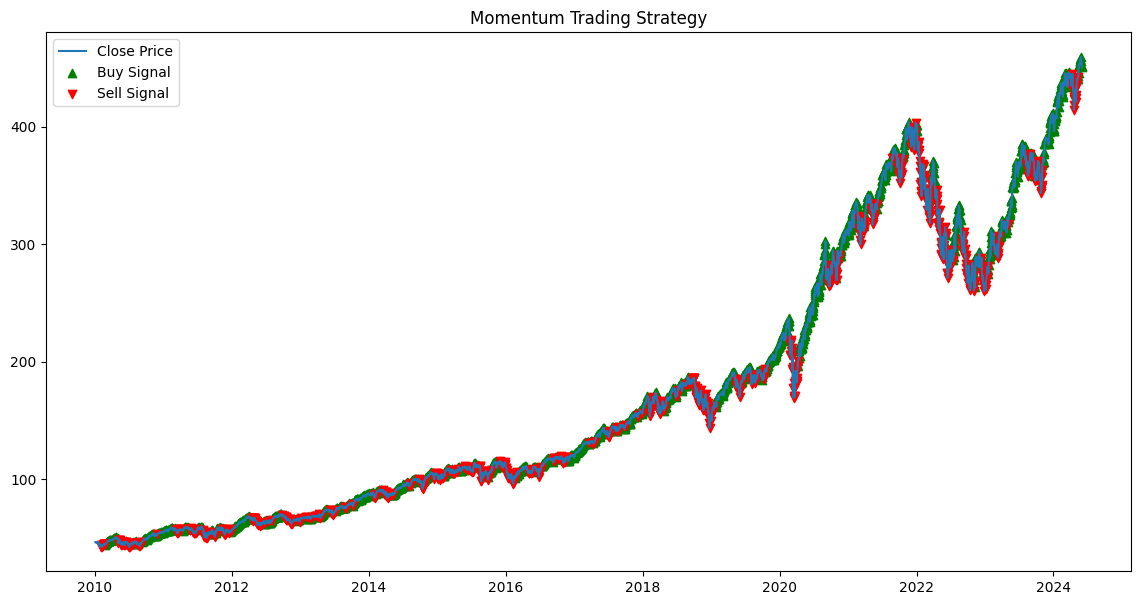

Initial Capital: $10000
Final Capital: $27190.570400099226
Total Profit: $17190.570400099226
Number of Trades: 306
Sharpe Ratio: 0.44204748050922277
Maximum Drawdown: -0.24009017466211102
Win Rate: 0.5226144511858798


In [78]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load historical stock data
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-06-01', progress=False)

# Calculate momentum indicator
def calculate_momentum(data, window=20):
    data['Momentum'] = data['Close'].pct_change(periods=window)
    return data

look_back_period = 20
stock_data = calculate_momentum(stock_data, window=look_back_period)

# Generate buy/sell signals
def generate_signals(data, threshold=0):
    data['Signal'] = 0
    data['Signal'] = np.where(data['Momentum'] > threshold, 1, np.where(data['Momentum'] < -threshold, -1, 0))
    data['Position'] = data['Signal'].shift()
    return data

threshold = 0
stock_data = generate_signals(stock_data, threshold)

# Backtest
def backtest_strategy(data, initial_capital=10000):
    data['Returns'] = data['Close'].pct_change()
    data['Strategy Returns'] = data['Returns'] * data['Position']
    data['Cumulative Returns'] = (1 + data['Strategy Returns']).cumprod()
    final_capital = initial_capital * data['Cumulative Returns'].iloc[-1]
    return data, final_capital

stock_data, final_capital = backtest_strategy(stock_data)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.scatter(stock_data.index[stock_data['Position'] == 1], stock_data['Close'][stock_data['Position'] == 1], label='Buy Signal', marker='^', color='g')
plt.scatter(stock_data.index[stock_data['Position'] == -1], stock_data['Close'][stock_data['Position'] == -1], label='Sell Signal', marker='v', color='r')
plt.legend()
plt.title('Momentum Trading Strategy')
plt.show()

# Calculate performance metrics
initial_capital = 10000
strategy_returns = stock_data['Strategy Returns'].dropna()
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
cumulative_returns = (1 + strategy_returns).cumprod()
drawdown = cumulative_returns / np.maximum.accumulate(cumulative_returns) - 1
max_drawdown = drawdown.min()
win_rate = len(strategy_returns[strategy_returns > 0]) / len(strategy_returns)
num_trades = stock_data['Position'].diff().abs().sum() / 2

# Print performance
print(f"Initial Capital: ${initial_capital}")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit: ${final_capital - initial_capital}")
print(f"Number of Trades: {int(num_trades)}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")
print(f"Win Rate: {win_rate}")


# Linear Regression and MACD

Mean Squared Error: 49.510969730345636


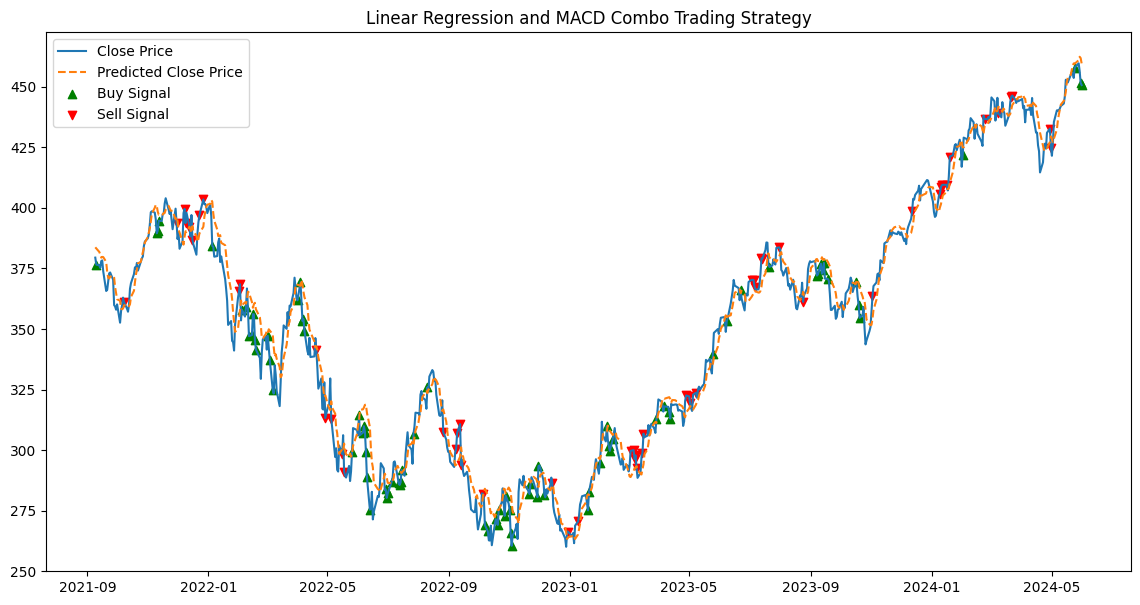

Initial Capital: $10000
Final Capital: $12086.10861197802
Total Profit: $2086.1086119780193
Number of Trades: 78
Sharpe Ratio: 0.5935788383603314
Maximum Drawdown: -0.1354370623723884
Win Rate: 0.09927007299270073


In [82]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import ta

# Load historical stock data
stock_data = yf.download('QQQ', start='2010-01-01', end='2024-06-01', progress=False)

# Feature engineering
def add_technical_indicators(data):
    data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)
    data['SMA_200'] = ta.trend.sma_indicator(data['Close'], window=200)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=14)
    data['Momentum'] = data['Close'].pct_change(periods=10)
    
    # MACD
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    
    data = data.dropna()
    return data

stock_data = add_technical_indicators(stock_data)

# Prepare the data
def prepare_data(data):
    features = ['SMA_50', 'SMA_200', 'RSI', 'ATR', 'Momentum', 'MACD', 'MACD_Signal', 'MACD_Diff']
    X = data[features]
    y = data['Close'].shift(-1)  # Predict the next day's close price
    X = X.dropna()
    y = y.dropna()
    return X, y

X, y = prepare_data(stock_data)

# Ensure x and y are the same length
min_length = min(len(X), len(y))
X = X.iloc[:min_length]
y = y.iloc[:min_length]

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Generate buy/sell signals
def generate_signals(data, y_pred, threshold=0.01):
    data = data.iloc[-len(y_pred):].copy()
    data['Predicted_Close'] = y_pred
    data['Signal'] = 0
    data['Signal'] = np.where((data['Predicted_Close'] > data['Close'] * (1 + threshold)) & 
                              (data['MACD'] > data['MACD_Signal']), 1, 
                              np.where((data['Predicted_Close'] < data['Close'] * (1 - threshold)) & 
                                       (data['MACD'] < data['MACD_Signal']), -1, 0))
    data['Position'] = data['Signal'].shift()
    return data

stock_data_signals = generate_signals(stock_data, y_pred)

# Backtest
def backtest_strategy(data, initial_capital=10000):
    data['Returns'] = data['Close'].pct_change()
    data['Strategy Returns'] = data['Returns'] * data['Position']
    data['Cumulative Returns'] = (1 + data['Strategy Returns']).cumprod()
    final_capital = initial_capital * data['Cumulative Returns'].iloc[-1]
    return data, final_capital

stock_data_signals, final_capital = backtest_strategy(stock_data_signals)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data_signals['Close'], label='Close Price')
plt.plot(stock_data_signals['Predicted_Close'], label='Predicted Close Price', linestyle='--')
plt.scatter(stock_data_signals.index[stock_data_signals['Position'] == 1], stock_data_signals['Close'][stock_data_signals['Position'] == 1], label='Buy Signal', marker='^', color='g')
plt.scatter(stock_data_signals.index[stock_data_signals['Position'] == -1], stock_data_signals['Close'][stock_data_signals['Position'] == -1], label='Sell Signal', marker='v', color='r')
plt.legend()
plt.title('Linear Regression and MACD Combo Trading Strategy')
plt.show()

# Calculate performance metrics
initial_capital = 10000
strategy_returns = stock_data_signals['Strategy Returns'].dropna()
sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
cumulative_returns = (1 + strategy_returns).cumprod()
drawdown = cumulative_returns / np.maximum.accumulate(cumulative_returns) - 1
max_drawdown = drawdown.min()
win_rate = len(strategy_returns[strategy_returns > 0]) / len(strategy_returns)
num_trades = stock_data_signals['Position'].diff().abs().sum() / 2

# Print performance
print(f"Initial Capital: ${initial_capital}")
print(f"Final Capital: ${final_capital}")
print(f"Total Profit: ${final_capital - initial_capital}")
print(f"Number of Trades: {int(num_trades)}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")
print(f"Win Rate: {win_rate}")




# Overall Advanced LSTM had the highest Sharpe ratio but the basic LSTM had the highest win rate.